In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Some Numerical Information about the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

## Data Preprocessing

In [4]:
# Create Age Group
df['Age'] = pd.cut(df['Age'], bins = [20, 30, 40, 50, 60, 70, 82], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '+70'])

In [5]:
# Drop outlayers from SkinThickness
df = df[df['SkinThickness']<90]

## Data Visualization

In [6]:
# Define list of Continuous columns Names
continuous = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']

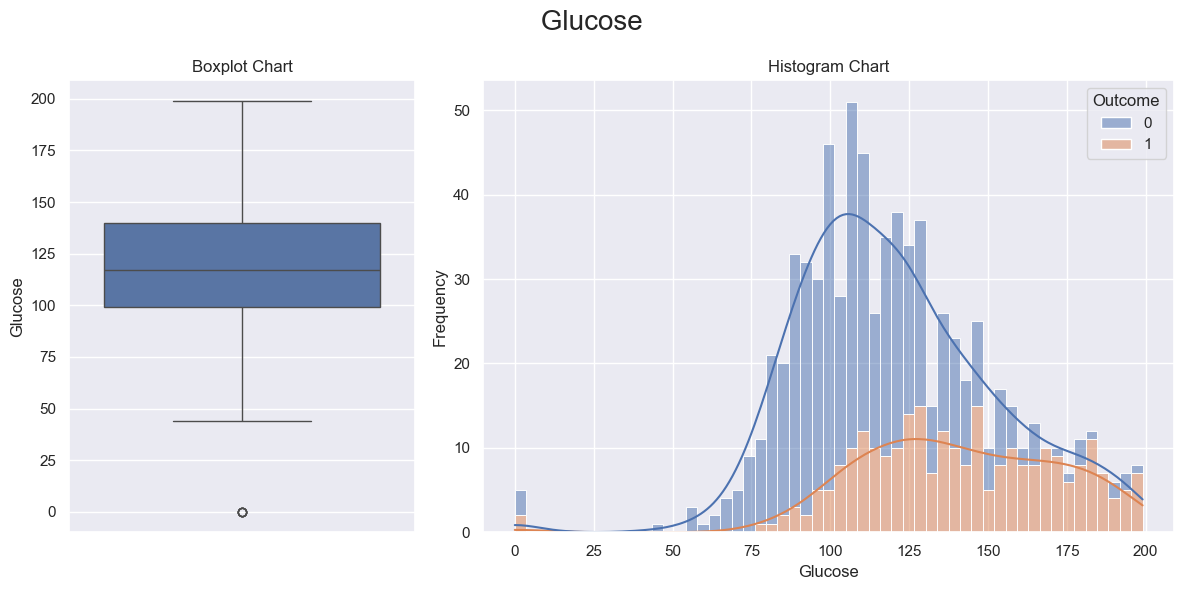

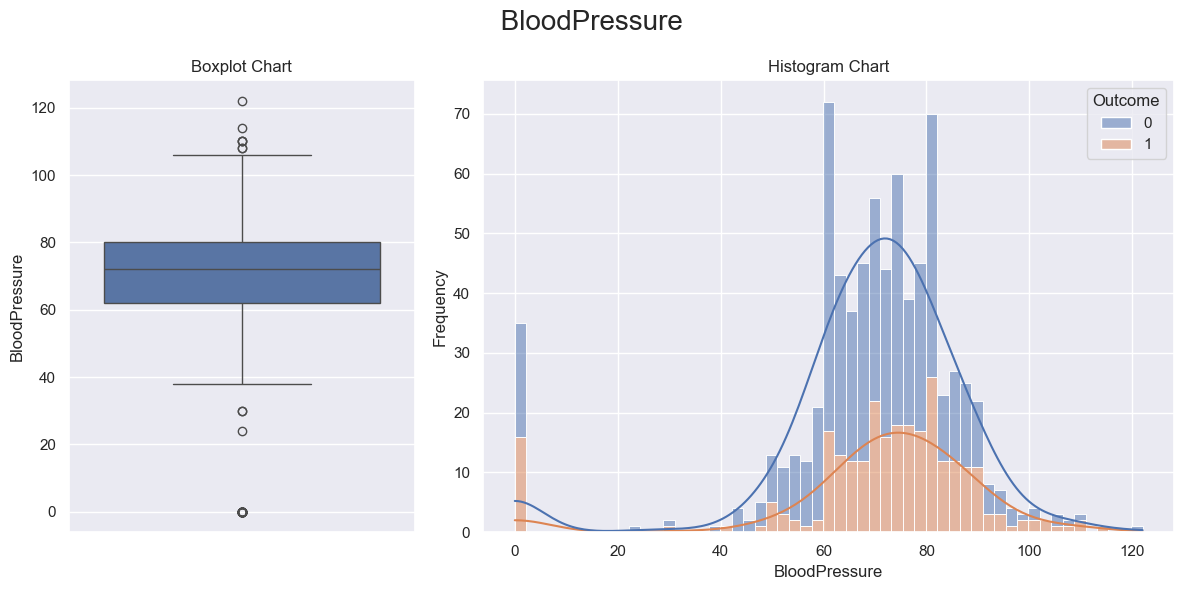

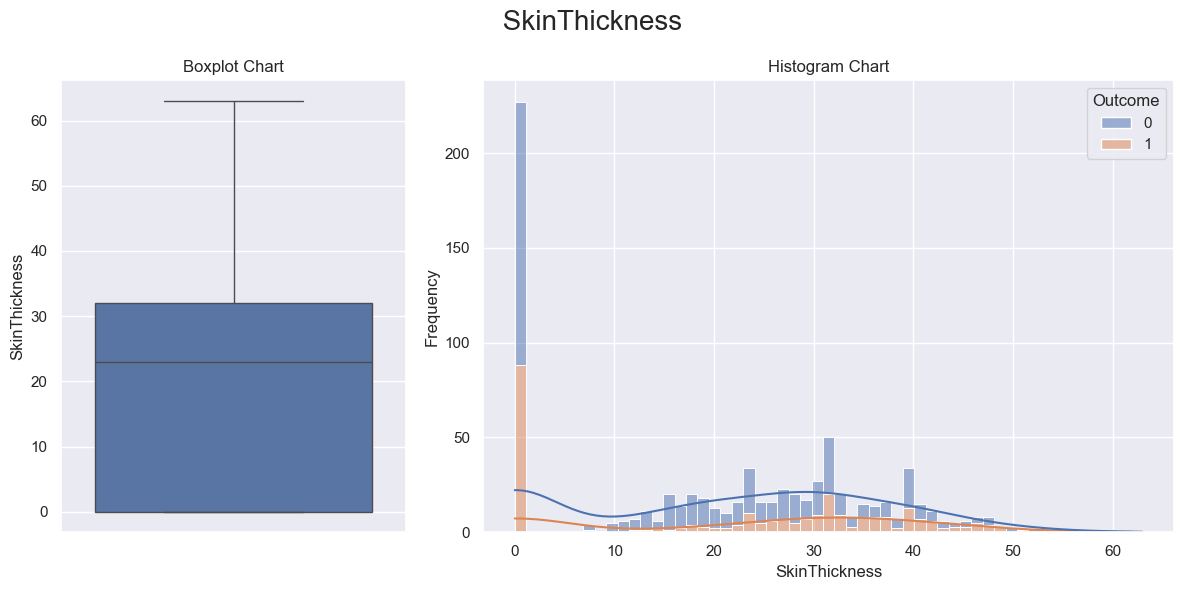

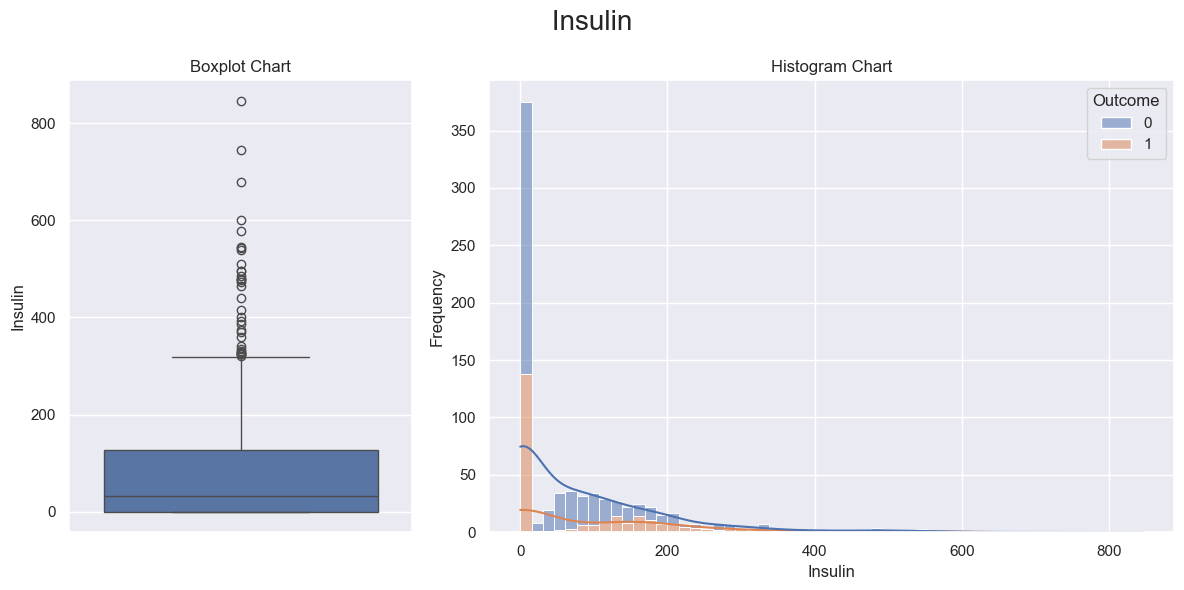

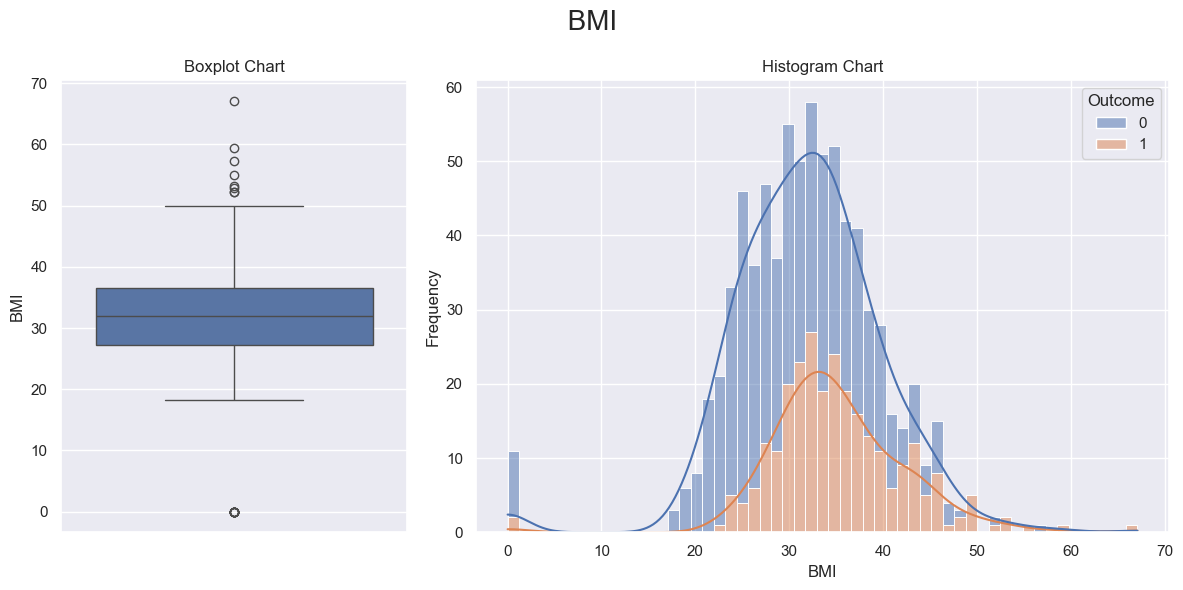

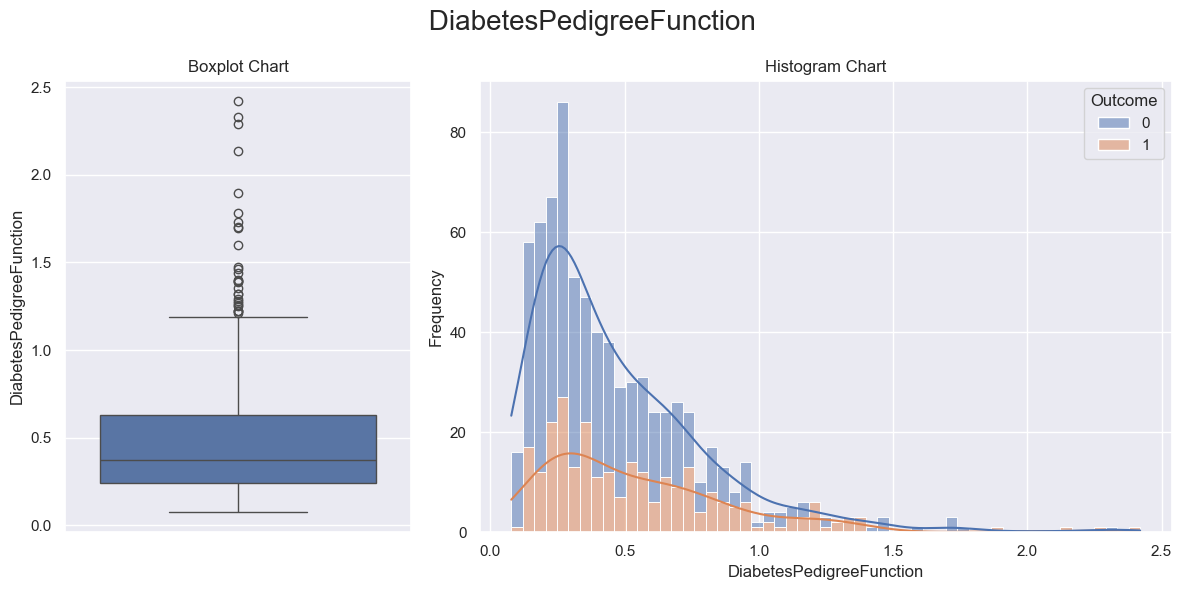

In [7]:
# Distribution of Categorical Features
def plot_continious_distribution(df, column, hue):

    width_ratios = [2, 4]
    gridspec_kw = {'width_ratios':width_ratios}
    fig, ax = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw = gridspec_kw) 
    fig.suptitle(f' {column} ', fontsize=20) 
    
    sns.boxplot(df[column], ax=ax[0])
    ax[0].set_title('Boxplot Chart')
    ax[0].set_ylabel(column)

    sns.histplot(x = df[column], kde=True, ax=ax[1], hue=df[hue], multiple = 'stack', bins=55)
    ax[1].set_title('Histogram Chart')
    ax[1].set_ylabel('Frequency')
    ax[1].set_xlabel(column)

    plt.tight_layout()
    plt.show()
for conti in continuous :
    plot_continious_distribution(df, conti, 'Outcome')    

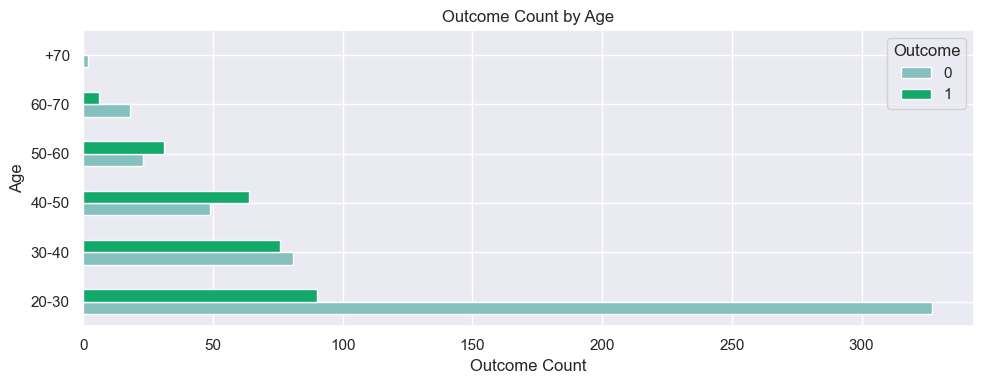

In [9]:
# Define a Function for Barh Plot
def bar_plot(x, y, df):
    barh = df.groupby([x, y]).size().unstack()
    barh.plot(kind='barh',  color = ['#84c0be', '#13a96b'], figsize=(10,4))
    plt.title(f'{y} Count by {x}')
    plt.xlabel(f'{y} Count')
    plt.ylabel(x)

    plt.tight_layout()
    plt.show()

bar_plot('Age', 'Outcome', df)

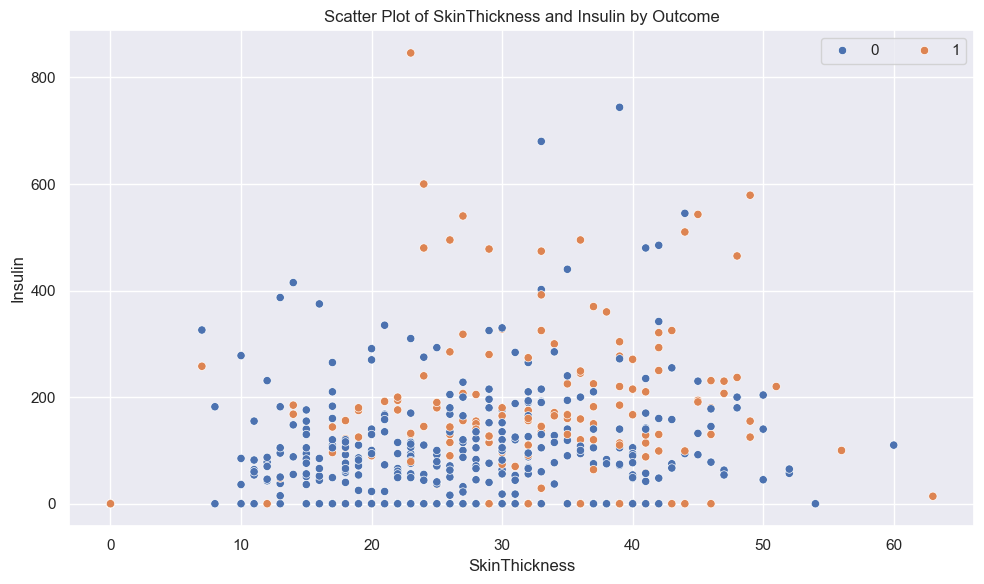

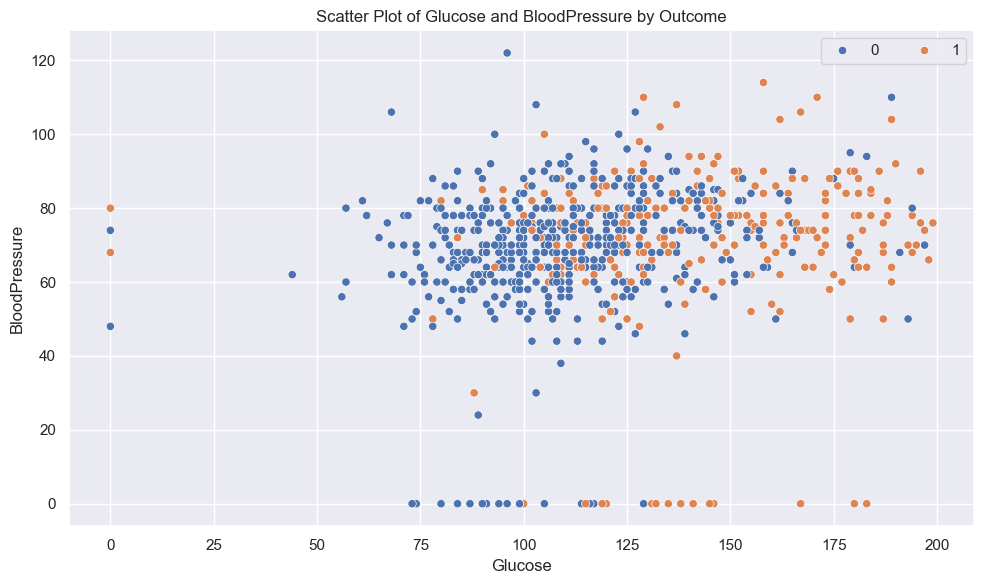

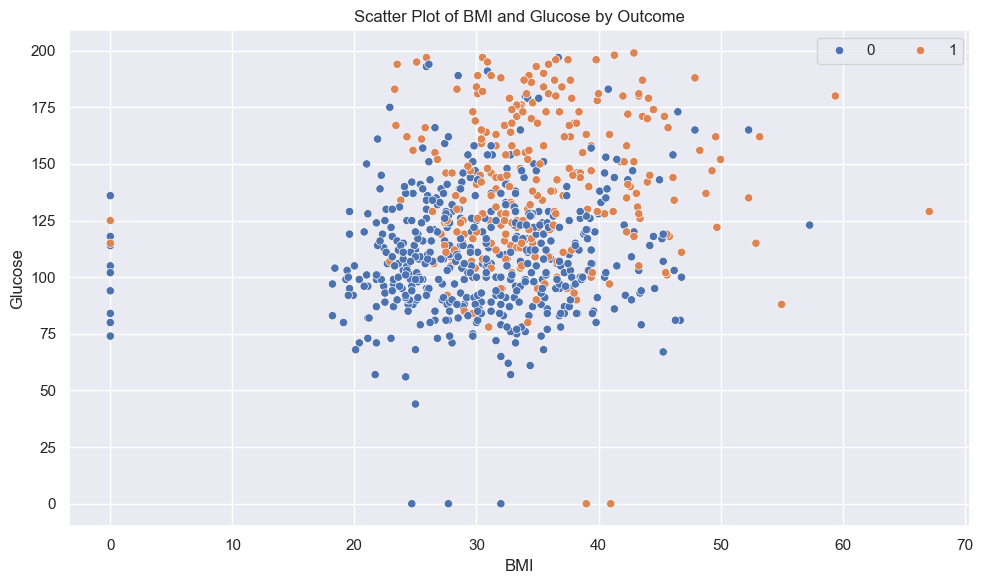

In [10]:
# Define a Function for Scatter Plot
def scatter_plot(data, x, y, hue):
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=data, x=x, y=y, hue=hue)
    plt.title(f'Scatter Plot of {x} and {y} by {hue}')
    plt.legend(title=None, ncol=2, loc='upper right')
    plt.xlabel(x)
    plt.ylabel(y)

    plt.tight_layout()
    plt.show()

scatter_plot(data=df, x="SkinThickness", y="Insulin", hue="Outcome")
scatter_plot(data=df, x="Glucose", y="BloodPressure", hue="Outcome")
scatter_plot(data=df, x="BMI", y="Glucose", hue="Outcome")

## Data Preprocessing

In [11]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
stc = StandardScaler()

stc_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']
dum_cols = ['Age']

# Apply Standard Scaler to the selected columns
df[stc_cols] = stc.fit_transform(df[stc_cols])

# Apply get_dummies to the selected columns
df = pd.get_dummies(df, columns=dum_cols)

## Training and Evaluating Different Models

In [12]:
from sklearn.model_selection import train_test_split 

x = df.drop(['Outcome'], axis=1)
y = df['Outcome']  # Target Variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [13]:
#Importing the Libraries
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [51]:
# List of Models to Try
models = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('XGB Classifier', XGBClassifier())
]

# Train and evaluate each model
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training accuracy: {name}', model.score(x_train, y_train))
    print(f'Test accuracy: {name}', accuracy_score(y_test, y_pred))
    print()

Training accuracy: Decision Tree 1.0
Test accuracy: Decision Tree 0.7337662337662337

Training accuracy: Random Forest 1.0
Test accuracy: Random Forest 0.8636363636363636

Training accuracy: Gradient Boosting 0.9216965742251223
Test accuracy: Gradient Boosting 0.7922077922077922

Training accuracy: K-Nearest Neighbors 0.8140293637846656
Test accuracy: K-Nearest Neighbors 0.7857142857142857

Training accuracy: XGB Classifier 1.0
Test accuracy: XGB Classifier 0.7987012987012987



In [93]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
print(f'Training accuracy: Random Forest', rf.score(x_train, y_train))
print(f'Test accuracy: Random Forest', accuracy_score(y_test, rf_pred))

Training accuracy: Random Forest 1.0
Test accuracy: Random Forest 0.8571428571428571


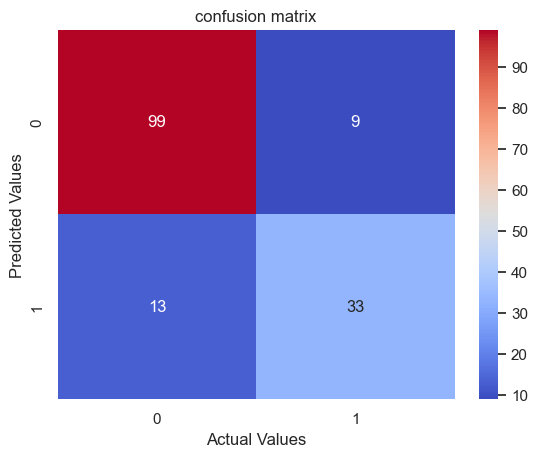

In [49]:
from sklearn.metrics import confusion_matrix, classification_report
sns.heatmap(confusion_matrix(y_test,rf_pred),annot= True, cmap = 'coolwarm', fmt='.0f')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('confusion matrix')
plt.show()

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       108
           1       0.79      0.72      0.75        46

    accuracy                           0.86       154
   macro avg       0.83      0.82      0.82       154
weighted avg       0.85      0.86      0.86       154



### As we can see in the above cell , precision of our model in the '1' values of taget is weak , so we gonna use of imblearn library for balancing values of target 

In [32]:
# redefine x and y
x = df.drop(['Outcome'], axis=1)
y = df['Outcome']  # Target Variable

In [33]:
from imblearn.over_sampling import SMOTE

# Initialize Smote
smote = SMOTE(random_state=0)

# Apply Smote to the x and y 
x_resampled, y_resampled = smote.fit_resample(x, y)
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=0)

In [34]:
# List of Models to Try
models = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('XGB Classifier', XGBClassifier())
]

# Train and evaluate each model
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training accuracy: {name}', model.score(x_train, y_train))
    print(f'Test accuracy: {name}', accuracy_score(y_test, y_pred))
    print()

Training accuracy: Decision Tree 1.0
Test accuracy: Decision Tree 0.715

Training accuracy: Random Forest 1.0
Test accuracy: Random Forest 0.88

Training accuracy: Gradient Boosting 0.90875
Test accuracy: Gradient Boosting 0.84

Training accuracy: K-Nearest Neighbors 0.84375
Test accuracy: K-Nearest Neighbors 0.815

Training accuracy: XGB Classifier 1.0
Test accuracy: XGB Classifier 0.87



In [62]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
print(f'Training accuracy: Random Forest', rf.score(x_train, y_train))
print(f'Test accuracy: Random Forest', accuracy_score(y_test, rf_pred))

Training accuracy: Random Forest 1.0
Test accuracy: Random Forest 0.89


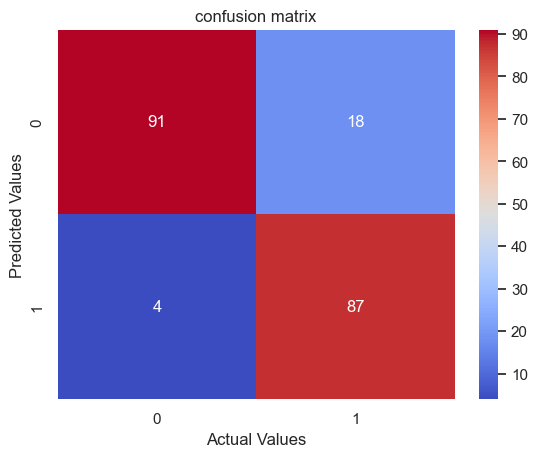

In [63]:
from sklearn.metrics import confusion_matrix, classification_report
sns.heatmap(confusion_matrix(y_test,rf_pred),annot= True, cmap = 'coolwarm', fmt='.0f')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.title('confusion matrix')
plt.show()

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89       109
           1       0.83      0.96      0.89        91

    accuracy                           0.89       200
   macro avg       0.89      0.90      0.89       200
weighted avg       0.90      0.89      0.89       200



By employing the SMOTE method, the number of samples for minority classes has increased, leading to an enhancement in the predictive accuracy of the model. Rebalancing the model with new and balanced data has resulted in improved performance in predicting fraudulent warranty claims.

These findings demonstrate that utilizing class balancing techniques like SMOTE can significantly enhance the performance of fraud prediction models. Therefore, it is recommended to employ ADASYN and machine learning models trained using this method for analyzing and predicting warranty claims fraud, as it can lead to improved accuracy and predictive capability of the models.

### *Developed by Hosein Mohammadi*
GitHub : https://github.com/Hosein541

Kaggle : https://www.kaggle.com/hoseinnnnnnn 

Gmail : Huseinmohammadi83@gmail.com